<a href="https://colab.research.google.com/github/quochungtran/build-road-signal-classifiations/blob/master/build_road_signal_classifiations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **SET UP**










In [ ]:
import tensorflow as tf
tf .__version__

'2.11.0'

In [ ]:
# connect gitlab to drive to be a place to store data
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/My Drive/deep_learning_exercise

/content/drive/My Drive/deep_learning_exercise


#**Downlad data set**

In [ ]:
# wget is a command-line tool commonly used in Linux 
# and other Unix-based operating systems to download files from the internet.
!pip3 install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=51bd5690a478e8afd659ffffd2a3e3da27dc56ee8d5f3d1790862dd89b2636a1
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [ ]:
# import setting up packages
import wget
import pickle
import matplotlib.pyplot as plt

In [ ]:
# Define the principal paths 

DATA_LINK      = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"
CURRENT_FOLDER = "./" # Unzip in the current directory

# training, validaition, testing dataset path
TRAINING_DATA_PATH   = CURRENT_FOLDER + "train.p"
VALIDATION_DATA_PATH = CURRENT_FOLDER + "valid.p"
TESTING_DATA_PATH    = CURRENT_FOLDER + "test.p"

In [ ]:
wget.download(DATA_LINK)

'traffic-signs-data (5).zip'

In [ ]:
!unzip -q traffic-signs-data.zip -d $data

error:  must specify directory to which to extract with -d option


In [ ]:
def deserialize_data(data_path):
  with open(data_path,mode='rb') as f:
    data_set = pickle.load(f)
  return data_set 

## Training, validation and testing sets

In [ ]:
train_set = deserialize_data(TRAINING_DATA_PATH)
valid_set = deserialize_data(VALIDATION_DATA_PATH)
test_set  = deserialize_data(TESTING_DATA_PATH)

In [ ]:
items = train_set.items()
for key, values in items:
  print(f"key: {key}, type of values {type(values)}")

key: coords, type of values <class 'numpy.ndarray'>
key: labels, type of values <class 'numpy.ndarray'>
key: features, type of values <class 'numpy.ndarray'>
key: sizes, type of values <class 'numpy.ndarray'>


In [ ]:
trainy      = train_set["labels"]


In [ ]:
trainX      = train_set["features"]
trainy      = train_set["labels"]
validationX = valid_set["features"]
validationy = valid_set["labels"]
testingX    = test_set["features"]
testingy    = test_set["labels"]

In [ ]:
trainX.shape

(34799, 32, 32, 3)

In [ ]:
print(f"training   data set size {trainX.shape[0]}")
print(f"validation data set size {validationX.shape[0]}")
print(f"testing    data set size {testingX.shape[0]}")

training   data set size 34799
validation data set size 4410
testing    data set size 12630


- There are 34799 images with dimensions 32x32x3 with that is a 2-dimensional image with a width of 32 pixels and a height 32 pixels, and it has 3 color channels: red, green, and blue (RGB).

- In term of RGB images, each pixel is represented as a combination of three color channels, with values ranging from 0 to 255.

- An RGB image with dimensions 32 x 32 x 3 has a total of 3,072 pixels (32 x 32 x 3), with each pixel being represented by three values for its red, green, and blue color channels.


## Visualization data 

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

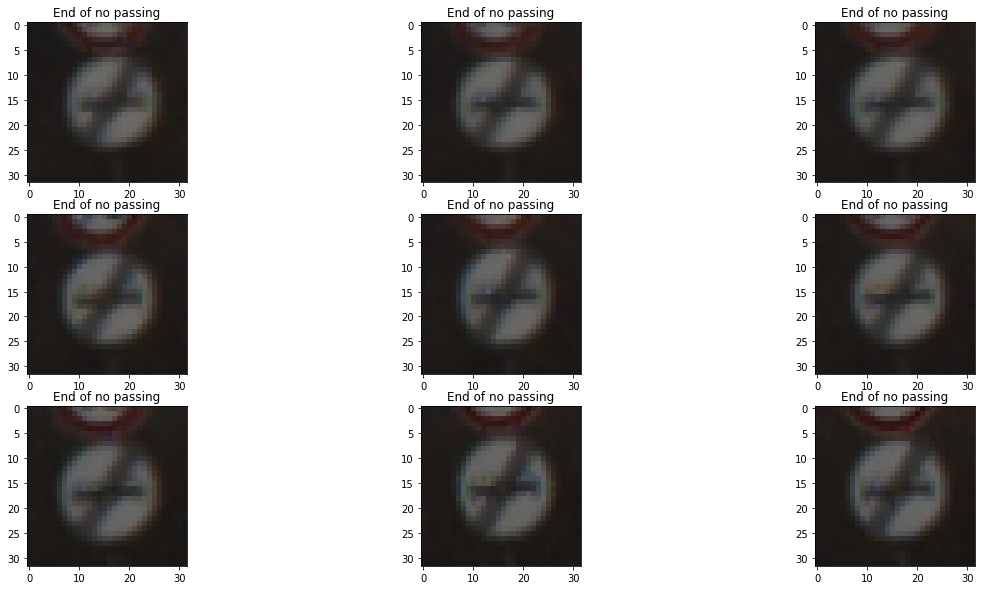

In [ ]:
fig = plt.figure(figsize = (20, 10))
dim = 3
start_point = 1
fig_num = 1

for i in range(start_point, dim*dim + start_point):
    ax = fig.add_subplot(dim, dim, fig_num)
    fig_num += 1
    ax.imshow(trainX[i])
    ax.set_title(classNames[trainy[i]])

Consider that the first 9 images in dataset is same, this lead to lack of the generation of training model so we need to shuffle the data. 

In [ ]:
from  sklearn.utils import shuffle  
trainX, trainy = shuffle(trainX,trainy)

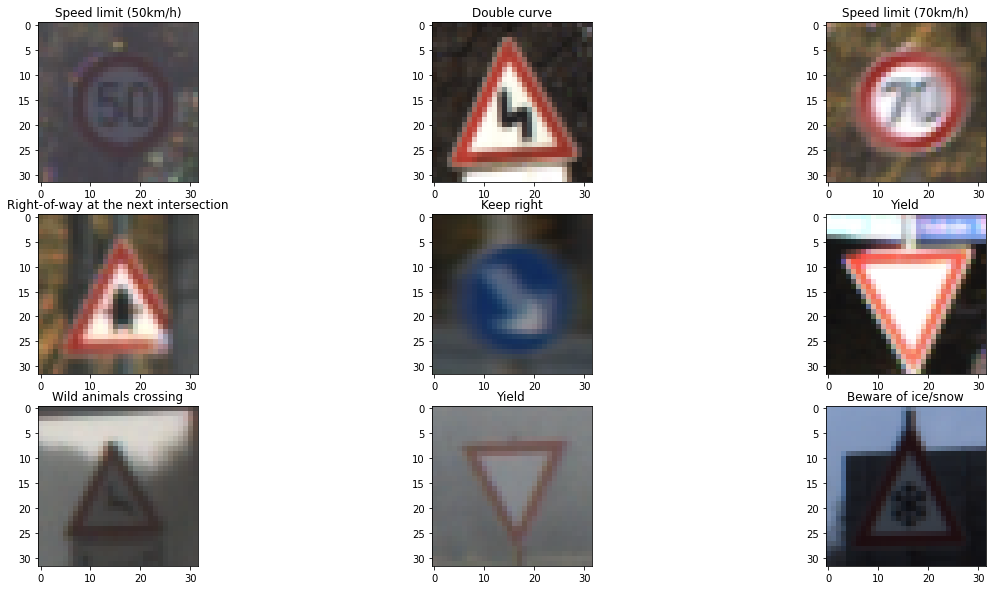

In [ ]:
fig = plt.figure(figsize = (20, 10))
dim = 3
start_point = 1
fig_num = 1

for i in range(start_point, dim*dim + start_point):
    ax = fig.add_subplot(dim, dim, fig_num)
    fig_num += 1
    ax.imshow(trainX[i])
    ax.set_title(classNames[trainy[i]])

## Take a look at class balances in our dataset

In [ ]:
def plot_class_histogram(classes):
    num_classes = len(set(classes))  # get the number of unique classes
    plt.hist(classes, bins=num_classes)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title('Histogram of Class Frequencies')
    plt.show()

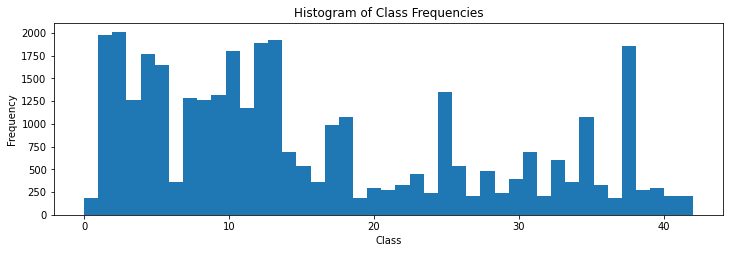

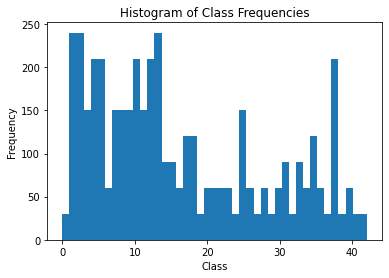

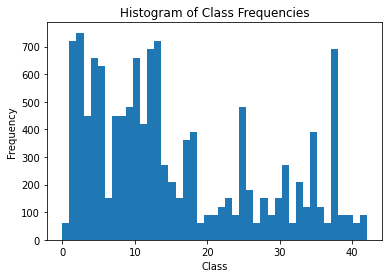

In [ ]:
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(3, 1, 1)
plot_class_histogram(train_set["labels"])

ax = fig.add_subplot(3, 1, 2)
plot_class_histogram(valid_set["labels"])

ax = fig.add_subplot(3, 1, 3)
plot_class_histogram(test_set["labels"])

## Preprocessing image

### Normalization data


Typically, there are many advantages while using normalization:

Normalizing images is an important step in preprocessing data for deep learning problems. The main reasons for normalizing images are:

- To make the data more manageable for the neural network: Neural networks work best when the input data is standardized, as it helps the network to learn the features of the data more effectively. Normalizing images can help to ensure that the data is in a consistent range, which can help to improve the performance of the network.


- To reduce the impact of illumination differences: Images can have a wide range of brightness and contrast, which can make it difficult for the network to distinguish between different features in the image. Normalizing images can help to reduce the impact of illumination differences and ensure that the network focuses on the important features of the image.


- To reduce overfitting: Normalizing images can help to reduce overfitting, which occurs when the model learns to recognize specific examples rather than generalizing to new data. Normalizing images can help to prevent the model from becoming too sensitive to the specific pixel values of the input images.

Overall, normalizing images is an important preprocessing step that can help to improve the performance of deep learning models.

In [ ]:
def standard_norm(image):
  return image.astype("float") / 255.0

def min_max_norm(image):
    image = (image - np.min(image)) / (np.max(image) - np.min(image))
    return image

def z_score_norm(image):
    image = (image - np.mean(image)) / np.std(image)
    return image

def unit_vector_norm(image):
    norm = np.sqrt(np.sum(image ** 2))
    image = image / norm
    return image


In [ ]:
# we chose standard_norm
trainX      = trainX.astype("float")/255.0
validationX = validationX.astype("float")/255.0
testingX    = testingX.astype("float")/255.0

### One hot coding labels in Tensorflow  

In [ ]:

from sklearn.preprocessing import LabelBinarizer # this API made each label to one hot vector
# note : we can use tf.one hot instead

In [ ]:
lb = LabelBinarizer()
trainy      = lb.fit_transform(trainy)
validationy = lb.fit_transform(validationy)

In [ ]:
trainy[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#**Building the model**

## What is VGG16 used for
VGG16 is object detection and classification algorithm which is able to classify 1000 images of 1000 different categories with 92.7% accuracy. It is one of the popular algorithms for image classification and is easy to use with transfer learning.



In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
# initialization model bằng API Sequential
model = Sequential()

# initialization params 
width = 32
height = 32
Classes = 43

shape = (width, height, 3 ) # shape of input image

In [ ]:
def create_model():
  # initialization model bằng API Sequential
    model = Sequential()
    # ---
    # adds a 2D convolutional layer with 32 filters of size 3x3. 
    # "same" padding mode: ensure that the output has the same spatial dimensions as the input. 
    # shape of the input data: 3D tensor with dimensions (height, width, channels).
    model.add(Conv2D(32 , (3,3), padding="same", input_shape=shape))
    # applies the rectified linear unit activation function to the output of the previous layer. 
    model.add(Activation("relu")) 
    # normalizes the activations of the previous layer across the mini-batch. 
    # reduce internal covariate shift and improves the stability and convergence of the model.
    model.add(BatchNormalization())
    # ---
    # adds another 2D convolutional layer with 32 filters of size 3x3, using "same" padding.
    model.add(Conv2D(32 , (3,3),padding="same"))
    # adds another batch normalization layer.
    model.add(BatchNormalization())
    # ---
    model.add(Conv2D(32 , (3,3),padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization())   
    # ---
    model.add(MaxPooling2D(pool_size=(2,2)))
    # ---
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    # ---
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    # ---
    # adds a max pooling layer with a pooling window of size 2x2
    # downsamples the spatial dimensions of the previous layer by taking the maximum value within each window
    model.add(MaxPooling2D(pool_size=(2,2)))
    # ---
    # flattens the output of the previous layer into a 1D vector.
    model.add(Flatten()) 
    # adds a fully connected layer with 512 neurons.
    model.add(Dense(512))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dense(Classes))
    # adds another fully connected layer with Classes neurons 
    model.add(Activation("softmax")) # duỗi thành 43 hợp vs y 
    # ---
    return model

In [ ]:
model = create_model().summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)       

## Train model

- Utilize optimizng method: SGD(learning_rate=learning_rate, momentum=momentum), a **stochastic gradient descent (SGD)** optimizer with a specified learning rate and momentum. The learning_rate argument sets the step size of the optimizer, which determines how large of a step it takes in the direction of the gradient during each update. The momentum argument sets the momentum coefficient, which helps the optimizer continue moving in the same direction as previous updates, even when the gradient changes direction.

- Categorical cross-entropy is a commonly used **loss function** for multi-class classification problems. 

- The **metrics** argument sets the evaluation metrics to be used during training, which is accuracy in this case. Accuracy measures the fraction of correctly classified samples in the dataset.

In [ ]:
### train model 
# baseline hyper-params

# the number of epochs, or complete passes through the training dataset, to be used during training. 
# An epoch consists of one forward pass and one backward pass through the entire dataset.
epochs        = 10 

# the number of samples processed by the model during each training iteration. 
# A larger batch size can lead to faster training times, but may require more memory to store the gradients during backpropagation.
batch_size    = 64

# Determines how much the weights of the model are updated during each training iteration. 
# A higher learning rate can lead to faster convergence, but may cause the optimizer to overshoot the minimum and fail to converge. 
# A lower learning rate can lead to slower convergence, but may result in better convergence to the global minimum.
learning_rate = 0.01

In [ ]:
# augmentation data
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [ ]:
def train_model(model, epochs, batch_size, learning_rate):
  opt = SGD(learning_rate=learning_rate, momentum=0.9) # stochatic gradient descends
  model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
  print("Start training")
  H = (model.fit_generator(aug.flow(trainX, trainy, batch_size=batch_size), 
                           validation_data=(validationX, validationy), 
                           steps_per_epoch=trainX.shape[0]//batch_size, 
                           epochs=epochs, 
                           verbose=1)
      )
  return H

In [ ]:
import matplotlib.pyplot as plt

def evaluation_model(H):
    #-----------------------------------------------------------
    # Retrieve a list of list results on training and test data
    # sets for each training epoch
    #-----------------------------------------------------------
    acc      = H.history[     'accuracy' ]
    val_acc  = H.history[ 'val_accuracy' ]
    loss     = H.history[    'loss' ]
    val_loss = H.history['val_loss' ]

    epochs   = range(len(acc)) # Get number of epochs

    #------------------------------------------------
    # Plot training and validation accuracy per epoch
    #------------------------------------------------
    plt.plot  ( epochs,     acc )
    plt.plot  ( epochs, val_acc )
    plt.title ('Training and validation accuracy')
    plt.figure()

    #------------------------------------------------
    # Plot training and validation loss per epoch
    #------------------------------------------------
    plt.plot  ( epochs,     loss )
    plt.plot  ( epochs, val_loss )
    plt.title ('Training and validation loss'   )
    plt.legend()

## Tunning hyper-params

In [ ]:
import itertools
fig = plt.figure(figsize = (12, 12))
i = 1

# Define hyperparameter combinations to try
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]
epochs = [20]

tunning_hyper = False
if tunning_hyper:
    # Initialize a list to store the results
    results = []

    # Loop through all hyperparameter combinations
    for lr, batch_size, epoch in itertools.product(learning_rates, batch_sizes, epochs):
      
      # Create a new model instance
      model = create_model()
      
      # Train the model using the current hyperparameters
      H = train_model(model, epochs=epoch, batch_size=batch_size, learning_rate=lr)

      # Save the hyperparameters and results
      (results.append({'learning_rate': lr, 
                      'batch_size': batch_size, 
                      'epochs': epoch, 
                      'val_loss': H.history['val_loss'][-1], 
                      'val_acc': H.history['val_accuracy'][-1],
                      'history':H}))

    # Print the results
    for result in results:
      print(result)


<Figure size 864x864 with 0 Axes>

In [ ]:
# best hyper-params

learning_rate = 0.01
batch_size    =  32
epoch = 20

Start training
Epoch 1/20


<ipython-input-37-1165d20c8091>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = (model.fit_generator(aug.flow(trainX, trainy, batch_size=batch_size),


1087/1087 [==============================] - 37s 33ms/step - loss: 2.1993 - accuracy: 0.3771 - val_loss: 1.8356 - val_accuracy: 0.4746
Epoch 2/20
1087/1087 [==============================] - 29s 26ms/step - loss: 0.8627 - accuracy: 0.7156 - val_loss: 0.9761 - val_accuracy: 0.6930
Epoch 3/20
1087/1087 [==============================] - 31s 28ms/step - loss: 0.4047 - accuracy: 0.8657 - val_loss: 1.3303 - val_accuracy: 0.6567
Epoch 4/20
1087/1087 [==============================] - 32s 29ms/step - loss: 0.2456 - accuracy: 0.9173 - val_loss: 0.5523 - val_accuracy: 0.8311
Epoch 5/20
1087/1087 [==============================] - 31s 28ms/step - loss: 0.1672 - accuracy: 0.9441 - val_loss: 0.5191 - val_accuracy: 0.8601
Epoch 6/20
1087/1087 [==============================] - 28s 26ms/step - loss: 0.1307 - accuracy: 0.9566 - val_loss: 0.4850 - val_accuracy: 0.8683
Epoch 7/20
1087/1087 [==============================] - 29s 27ms/step - loss: 0.1031 - accuracy: 0.9660 - val_loss: 0.3981 - val_accura

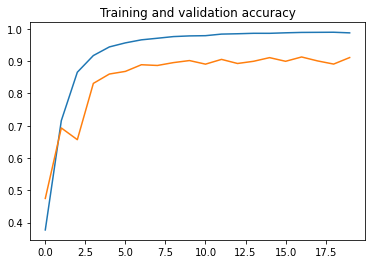

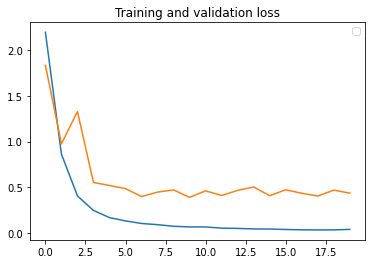

In [ ]:
# Create a new model instance
model = create_model()
  
# Train the model using the current hyperparameters
H = train_model(model, epochs=epoch, batch_size=batch_size, learning_rate=learning_rate)

# visualize training loss and validation
evaluation_model(H)

#**Predict , verifiy the model by  test_set**

In [ ]:
testingy = lb.fit_transform(testingy)

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(testingX, testingy, verbose=0)

In [ ]:
test_accuracy

0.929928719997406

1/1 [==============================] - 0s 23ms/step
True class name:  Speed limit (80km/h)


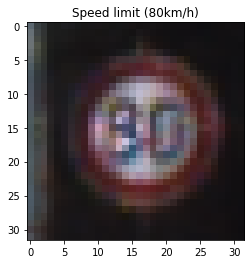

In [ ]:
import numpy as np

id_img = 1200
result = model.predict(testingX[id_img:id_img+1])   # a list of predicted prob correspoding to each class
final=np.argmax(result) # finding index whose value is biggest
final = classNames[final]

plt.imshow(test_set["features"][id_img])
print("True class name: ", classNames[test_set["labels"][id_img]])
plt.title(final)
plt.show()